<img src='https://git.services.meeo.it/ltpy/climate/-/raw/main/SMA2024_CM_SAF/img/CM_SAF_banner.png' align='center' width='100%'>

# **CLARA - A new Climate Data Record on Earth’s Radiation Budget**

## _**20 September 2023 - ONLINE Short Course**_

<div class="alert alert-block alert-success">
<b> <span style="color:blue">Using the data - Jupyter Notebook</span></b></div>

<hr>

### **Introduction**

This notebook will introduce two products of <span style="color:red">**CLARA-A3**</span>, the new release of **CM SAF’s Cloud, Radiation and Surface Albedo data record, AVHRR-based**, showing how to download the products, how to extract the variables then analyzing and visualizing the related data.

### **Products in use**

The following **CLARA-A3** products will be used in this notebook:

| **Product Name**                               | Product Family | Area | Temp. Resolution | Spat. Resolution (degrees) | Stat. |
|--------------------------------------------| ----| ---  |:---: | :---: | --- |
| [<span style="color:red">**CFC - Fractional Cloud Cover**</span>](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=22277_22492&fid=40) | <span style="color:blue">**CLARA-A ed. 3.0**</span> | <span style="color:blue">**Global**</span> | <span style="color:blue">**Monthly**</span> | <span style="color:blue">**0.25 x 0.25**</span> | <span style="color:blue">**Mean**</span> |
| [<span style="color:red">**SAL - Surface Albedo**</span>](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=22452_22559&fid=40) | <span style="color:blue">**CLARA-A ed. 3.0**</span> | <span style="color:blue">**Global**</span> | <span style="color:blue">**Monthly**</span> | <span style="color:blue">**0.25 x 0.25**</span> | <span style="color:blue">**Mean**</span> |
| [<span style="color:red">**SIS - Surface Incoming Shortwave radiation**</span>](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=22452_22559&fid=40) | <span style="color:blue">**CLARA-A ed. 3.0**</span> | <span style="color:blue">**Global**</span> | <span style="color:blue">**Monthly**</span> | <span style="color:blue">**0.25 x 0.25**</span> | <span style="color:blue">**Mean**</span> |

### **Outline**

* [**1. Downloading CLARA-A3 Products**](#load)
* [**2. Reading CLARA-A3 Products**](#read)
* [**3. Data Extraction and Analysis (tasks)**](#analysis)

### **Importing required libraries**

In [8]:
import tarfile
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpr
from matplotlib import cm as cm
import matplotlib.pyplot as plt
import geopandas
import rioxarray as rio
from shapely.geometry import mapping
import matplotlib
import os
import colormaps as cmaps
import warnings
warnings.filterwarnings("ignore")

<hr>

### <a id="load"></a>**1. Downloading CLARA-A3 products**

Depending on the data that are needed by the user, there are different ways to download CLARA-A3 products in the Jupyter environmemt and use them in a Jupyter Notebook.

<span style="color:blue">**Option 1** </span>: **pre-modified data**: load CLAAS-3 products using the available **URL** (these are pre-modified files containing one or more variables per NetCDF file, with specific spatial and temporal ranges, that can be accessed from a CM SAF public server.

For this course, the data are available at the following link:

**[https://public.cmsaf.dwd.de/data/perm/training/CLARA-A_SC/](https://public.cmsaf.dwd.de/data/perm/training/CLARA-A_SC/)**

The user can then download each of the file in the repository by using the **wget** instruction of the **terminal** window available in the Jupyter instance, or running the same instruction directly in the notebook. 

The following example shows how to download one of the available products from the server. 
First the directory of destination and the file to download should be chosen:

In [21]:
folder = '../MyData/ORD49903.tar' #final directory
url = 'https://public.cmsaf.dwd.de/data/perm/training/CLARA-A_SC/CLARA-A3_SISmm_2023-08.nc'

Then it is possible to run the terminal istruction in a Python cell:

In [22]:
os.system('wget -P ' + folder + ' ' + url)

--2023-09-19 16:58:06--  https://public.cmsaf.dwd.de/data/stkothe/CLARA-A_SC/Data/SISmm20230801000000319AVPOSI1GL.nc
Resolving public.cmsaf.dwd.de (public.cmsaf.dwd.de)... 141.38.2.25
Connecting to public.cmsaf.dwd.de (public.cmsaf.dwd.de)|141.38.2.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11201749 (11M) [application/octet-stream]
Saving to: ‘../MyData/ORD49903.tar/SISmm20230801000000319AVPOSI1GL.nc’

     0K .......... .......... .......... .......... ..........  0% 1.69M 6s
    50K .......... .......... .......... .......... ..........  0% 4.76M 4s
   100K .......... .......... .......... .......... ..........  1% 5.28M 3s
   150K .......... .......... .......... .......... ..........  1% 7.26M 3s
   200K .......... .......... .......... .......... ..........  2% 9.87M 3s
   250K .......... .......... .......... .......... ..........  2% 9.94M 2s
   300K .......... .......... .......... .......... ..........  3% 13.5M 2s
   350K .......... .........

0

The user can change the final director, or the filename to download a different product from the server.

<span style="color:blue">**Option 2.** </span> _**downloading original products**_: if the user needs to work directly with the original products, the process to download the products directly into the jupyter environment can be described in 3 steps:

- login at [**Web User Interface**](https://wui.cmsaf.eu/safira/action/viewHome) 

- search for a product, choose the related options in the [**search form**](https://wui.cmsaf.eu/safira/action/viewProduktSearch) and submit an order

- the email address associated to the CM SAF account will receive 2 messages for each order: the first confirming the successful request, while the second providing the download options for the products; the download email will contain also the **wget** instruction that can be used to download the product as a **.tar** file. The user can get the product running the following Python line in a cell of code:

     `os.system('<wget instruction in the email>')`

     the **.tar** file will be downloaded directly in the directory where the notebook has been created.
     
- unpack the **.tar** file to open the original products. 

The following example will show the whole process to get an original product ready to be used in the jupyter environment.

##### <span style="color:blue">**1.1 - Downloading an original CLARA-A3 product - example** </span> (valid only during the short course)

After submitting an order to get the SIS monthly product (whole globe) for August 2023 (as in the previous example), an email confirming the product availability will provide the **wget** instruction for download, valid only for this case:

`wget -r -np -nH --cut-dirs=1 --reject="index.html" --user=routcm --password=4gVdHUdpq8UhHcIJIP https://cmsaf.dwd.de/data/ORD51166/`

and the Python instruction will be:

In [13]:
os.system('wget -r -np -nH --cut-dirs=1 --reject="index.html" --user=routcm --password=4gVdHUdpq8UhHcIJIP https://cmsaf.dwd.de/data/ORD51166/')

--2023-09-19 16:54:55--  https://cmsaf.dwd.de/data/ORD51166/
Resolving cmsaf.dwd.de (cmsaf.dwd.de)... 141.38.2.29
Connecting to cmsaf.dwd.de (cmsaf.dwd.de)|141.38.2.29|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="restricted"
Reusing existing connection to cmsaf.dwd.de:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ORD51166/index.html.tmp’

     0K                                                        74.7M=0s

2023-09-19 16:54:56 (74.7 MB/s) - ‘ORD51166/index.html.tmp’ saved [280]

Loading robots.txt; please ignore errors.
--2023-09-19 16:54:56--  https://cmsaf.dwd.de/robots.txt
Reusing existing connection to cmsaf.dwd.de:443.
HTTP request sent, awaiting response... 404 Not Found
2023-09-19 16:54:56 ERROR 404: Not Found.

--2023-09-19 16:54:56--  https://cmsaf.dwd.de/data/ORD51166/ORD51166.tar
Reusing existing connection to cmsaf.dwd.de:443.
HTTP request sent, awaiting

0

The user will find a subfolder named **ORD51166** in the same directory of the notebook. The subfolder will contain the **TAR** file that needs to be unpacked. 
The code to unpack a TAR file is always the same. The user should just change the path of the original product and the destination path, when necessary. In this example:

In [24]:
my_tar = tarfile.open('ORD51166/ORD51166.tar')
my_tar.extractall()
my_tar.close()

Now the unpacked product `SISmm20230801000000319AVPOSI1GL.nc` is in the same folder where the notebook is located, ready to be opened as a NetCDF file.

<hr>

### <a id="read"></a>**2. Reading CLARA-A3 products**

#### **2.1 'Single product' case**

Every CLARA-A3 product is provided as a **NetCDF** file that can be loaded and opened with the [**Xarray**](https://docs.xarray.dev/en/stable/) Python library.
The data can be read directly from the available public server, providing the url of the selected product and the reading mode(which will never change for the purposes of this course)

As a first example the SIS monthly product of August 2023 will be read from the server:

In [2]:
SIS_month_rec = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/CLARA-A_SC/CLARA-A3_SISmm_2023-08.nc'+'#mode=bytes')
SIS_month_rec

<xarray.Dataset>
Dimensions:    (lon: 1438, lat: 718, time: 1, nb2: 2)
Coordinates:
  * lon        (lon) float64 -179.6 -179.4 -179.1 -178.9 ... 179.1 179.4 179.6
  * lat        (lat) float64 -89.62 -89.38 -89.12 -88.88 ... 89.12 89.38 89.62
  * time       (time) datetime64[ns] 2023-08-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    SIS        (time, lat, lon) float32 ...
    time_bnds  (time, nb2) float64 ...
Attributes: (12/22)
    Info:                       Created with the CM SAF R Toolbox.
    title:                      CM SAF Cloud, Albedo and Radiation dataset, A...
    summary:                    This file contains AVHRR-based Interim Climat...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    standard_name_vocabulary:   Standard Name Table (v70, 10 December 2019)
    institution:                EUMETSAT/CMSAF
    ...                         ...
    geospatial_lon_resolution:  0.25 degree
    product_version:            3.0
    platform_vocabulary:        GCMD Platforms, Version 9.1.5
    platform:                   Earth Observation Satellites > METOP,Earth Ob...
    instrument:                 AVHRR > Advanced Very High Resolution Radiometer
    date_created:               2023-09-05T10:49:21Z

Once opened, the product is described by an **Xarray Dataset** containing:
- Coordinates
- Data variables
- Attributes

The user can select a coordinate, for example **time** by typing

In [3]:
SIS_month_rec['time']

<xarray.DataArray 'time' (time: 1)>
array(['2023-08-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-08-01
Attributes:
    long_name:      time
    standard_name:  time
    bounds:         time_bnds

The result clearly shows that the product is associated to a single time step. The user can try to select **lat** or **lon** coordinates, verifying that the CLARA_A3 SIS product has a <u>**global**</u> spatial coverage.

The only data variable of interest is <span style="color:red">**SIS** </span> and it can be extracted from the original whole product with the following code:

In [4]:
SIS_data = SIS_month_rec.SIS
SIS_data

<xarray.DataArray 'SIS' (time: 1, lat: 718, lon: 1438)>
[1032484 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.6 -179.4 -179.1 -178.9 ... 179.1 179.4 179.6
  * lat      (lat) float64 -89.62 -89.38 -89.12 -88.88 ... 89.12 89.38 89.62
  * time     (time) datetime64[ns] 2023-08-01
Attributes:
    units:          W m-2
    standard_name:  surface_downwelling_shortwave_flux
    long_name:      Surface Downwelling Shortwave Radiation
    cmsaf_info:     cmsafops::box_mergetime for variable SIS

The new object is an Xarray **DataArray** which contains a single variable and only the attributes related to it.

When the user wants to visualize a variable for a single instantaneous/daily/monthly SARAH-3 product, the code should specify:

- the figure size
- the colormap  (find list of available colormaps in the [**Matplotlib**](https://matplotlib.org/stable/gallery/color/colormap_reference.html) page)
- the projection to plot the data on (find list of available projections in the [**Cartopy**](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) page) 
- the *transform* parameter to reproject data
- whether to draw **coastlines** and **gridlines** on the map

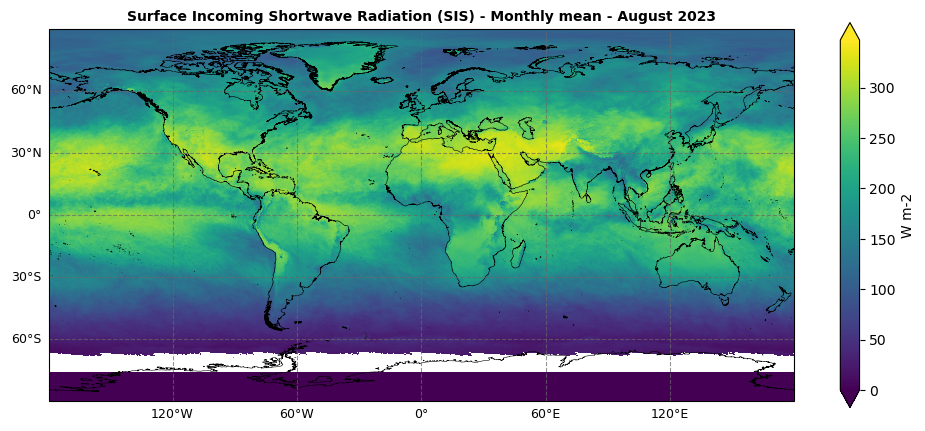

In [5]:
fig = plt.figure(figsize=(10,8))  #figure size
colormap = 'viridis'                #colormap selection

#---------------Product visualization--------------------------------
ax = plt.axes(projection= ccrs.PlateCarree())  #projection 
map_SIS = SIS_data.plot(transform=ccrs.PlateCarree(), add_colorbar=False, cmap=colormap)  #data visualization


#---------------gridlines options-----------------------------------
gl = ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='dimgray', 
              alpha=0.7, 
              linestyle='--', 
              draw_labels=True)
gl.top_labels=False
gl.right_labels=False
gl.xlabel_style={'size':9}
gl.ylabel_style={'size':9}


#---------------colorbar options-----------------------------------
cbar = plt.colorbar(map_SIS, shrink = 0.5, pad = 0.05, orientation='vertical',label= SIS_data.units, extend = 'both')

ax.coastlines(color='black',resolution = '10m',linewidth = 0.4) #coastline options

plt.title('Surface Incoming Shortwave Radiation (SIS) - Monthly mean - August 2023', fontweight='bold', fontsize = 10)

fig.tight_layout()

plt.savefig('../img/SIS_Globe_August2023.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

The user should have noticed that it is possible to save the resulting map as a png file: that means that each participant of the Jupyter session could produce the various maps described in the notebook and save them, so that they can be downloaded. 

It is worth mentioning that during and after the course the participants could share their maps and plots in the **CM SAF** [**PADLET**](https://padlet.com/CMSAF/the-cm-saf-padlet-azeujpu4vc9cbfcy) where results can be commented by CM SAF experts and others.

#### **2.2 'Multiple products' case** 

Besides accessing and visualizing a single product, dealing with CLARA-A3 data mainly means to manipulate a data record that can cover 40 years. For this course some pre-modified NetCDF files have been prepared for both SAL, CFC and SIS, with different spatial and temporal coverage. As an example, the CFC full data record has been stored in the NetCDF file:

`CLARA-A3_CFCmm_EU_1979-01-01-2023-08-01.nc  `

which can be opened from the remote repository:

In [6]:
CFC_month_rec = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/CLARA-A_SC/CLARA-A3_CFCmm_EU_1979-01-01-2023-08-01.nc'+'#mode=bytes')
CFC_month_rec

<xarray.Dataset>
Dimensions:    (lon: 184, lat: 156, time: 536, nb2: 2)
Coordinates:
  * lon        (lon) float64 -12.88 -12.62 -12.38 -12.12 ... 32.38 32.62 32.88
  * lat        (lat) float64 34.12 34.38 34.62 34.88 ... 72.12 72.38 72.62 72.88
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-08-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    cfc        (time, lat, lon) float32 ...
    time_bnds  (time, nb2) float64 ...
Attributes: (12/23)
    Info:                       Created with the CM SAF R Toolbox.
    title:                      CM SAF cLoud, Albedo and RAdiation dataset, A...
    summary:                    This file contains AVHRR-based Thematic Clima...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:            3.0
    creator_name:               DE/DWD
    ...                         ...
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    platform_vocabulary:        GCMD Platforms, Version 9.1.5
    platform:                   NOAA POES > NOAA Polar Orbiting Environmental...
    instrument_vocabulary:      GCMD Instruments, Version 9.1.5
    instrument:                 AVHRR > Advanced Very High Resolution Radiometer

If compared with the structure of a single product, the relevant difference is given by the **time** coordinate that is now equal to 536, so the dataset is made of 536 stacked monthly products, covering from 1979 to August 2023. The timestamps of all the monthly products can be visible extracting the **time** coordinate:

In [7]:
CFC_month_rec['time']

<xarray.DataArray 'time' (time: 536)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2023-06-01T00:00:00.000000000',
       '2023-07-01T00:00:00.000000000', '2023-08-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-08-01
Attributes:
    long_name:      time
    standard_name:  time
    bounds:         time_bnds

Starting from the overall structure, if the user wanted to extract a single variable, it would be necessary first to select which timestamp to consider:

In [8]:
CFC_month = CFC_month_rec.sel(time = '2023-08-01')
CFC_month

<xarray.Dataset>
Dimensions:    (lon: 184, lat: 156, nb2: 2)
Coordinates:
  * lon        (lon) float64 -12.88 -12.62 -12.38 -12.12 ... 32.38 32.62 32.88
  * lat        (lat) float64 34.12 34.38 34.62 34.88 ... 72.12 72.38 72.62 72.88
    time       datetime64[ns] 2023-08-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    cfc        (lat, lon) float32 ...
    time_bnds  (nb2) float64 1.957e+04 1.96e+04
Attributes: (12/23)
    Info:                       Created with the CM SAF R Toolbox.
    title:                      CM SAF cLoud, Albedo and RAdiation dataset, A...
    summary:                    This file contains AVHRR-based Thematic Clima...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:            3.0
    creator_name:               DE/DWD
    ...                         ...
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    platform_vocabulary:        GCMD Platforms, Version 9.1.5
    platform:                   NOAA POES > NOAA Polar Orbiting Environmental...
    instrument_vocabulary:      GCMD Instruments, Version 9.1.5
    instrument:                 AVHRR > Advanced Very High Resolution Radiometer

At this point, the single CFC variable can be extracted:

In [9]:
CFC_data = CFC_month.cfc
CFC_data

<xarray.DataArray 'cfc' (lat: 156, lon: 184)>
array([[40., 40., 40., ..., 15., 16., 18.],
       [40., 39., 38., ..., 13., 18., 26.],
       [43., 37., 35., ..., 17., 15., 14.],
       ...,
       [84., 86., 86., ..., 81., 80., 81.],
       [86., 88., 88., ..., 81., 81., 81.],
       [87., 87., 89., ..., 81., 83., 82.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -12.88 -12.62 -12.38 -12.12 ... 32.38 32.62 32.88
  * lat      (lat) float64 34.12 34.38 34.62 34.88 ... 72.12 72.38 72.62 72.88
    time     datetime64[ns] 2023-08-01
Attributes:
    units:          %
    standard_name:  cloud_area_fraction
    long_name:      cloud fraction
    cmsaf_info:     cmsafops::box_mergetime for variable cfc

The user will recognize a structure that is similar to what has been obtained in the previous section for the single SIS product, so it is possible to visualize the corresponding map as it has been done for the SIS variable:

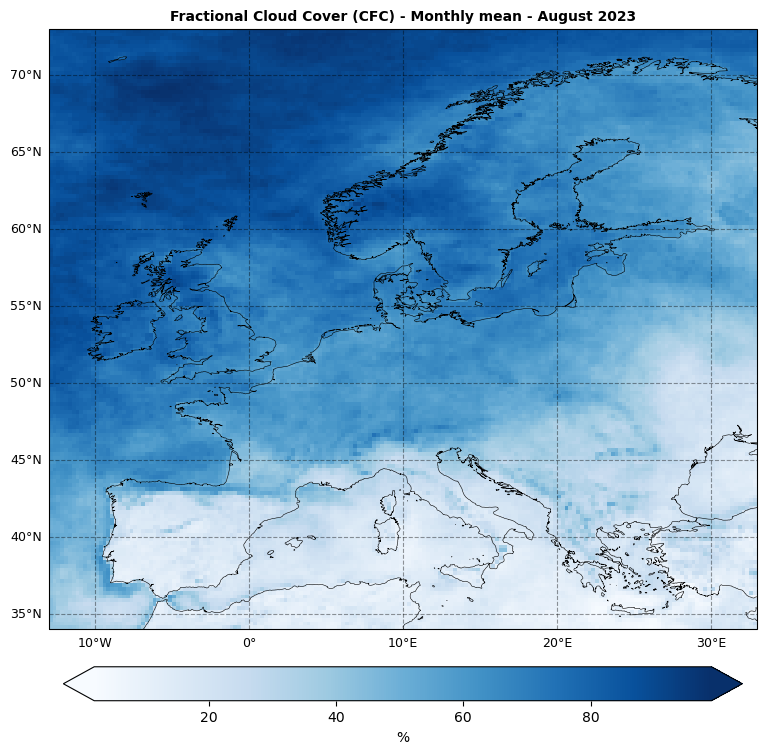

In [10]:
fig = plt.figure(figsize=(10,8))  #figure size
colormap = 'Blues'                #colormap selection

#---------------Product visualization--------------------------------
ax = plt.axes(projection= ccrs.PlateCarree())  #projection 
map_CFC = CFC_data.plot(transform=ccrs.PlateCarree(), add_colorbar=False, cmap=colormap)  #data visualization


#---------------gridlines options-----------------------------------
gl = ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.4, 
              linestyle='--', 
              draw_labels=True)
gl.top_labels=False
gl.right_labels=False
gl.xlabel_style={'size':9}
gl.ylabel_style={'size':9}


#---------------colorbar options-----------------------------------
cbar = plt.colorbar(map_CFC, shrink = 0.7, pad = 0.05, orientation='horizontal',label= CFC_data.units, extend = 'both')

ax.coastlines(color='black',resolution = '10m',linewidth = 0.4) #coastline options

plt.title('Fractional Cloud Cover (CFC) - Monthly mean - August 2023', fontweight='bold', fontsize = 10)

fig.tight_layout()

plt.savefig('../img/CFC_August2023_1.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

<hr>

### <a id="analysis"></a>**3. Data Extraction and Analysis (tasks)**

#### **Task 1: Plot the long-term (1991-2020) monthly mean of CLARA-A3 SAL for August for: a) global coverage, b) a country of your choice.**

##### **Task 1-a)**
- extract the variable of interest
- group data by month and compute the long term mean for each month 
- extract the data for the required month
- plot the map for the required month


The CFC product with global coverage is stored in the pre-modified file:

`CLARA-A3_black_sky_albedo_mm_1991-01-01-2020-12-01.nc`

and this is the one that must be read from the publib server, as already done in a previous example:

In [3]:
BSAL_month_rec = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/CLARA-A_SC/CLARA-A3_black_sky_albedo_mm_1991-01-01-2020-12-01.nc'+'#mode=bytes')
BSAL_month_rec

<xarray.Dataset>
Dimensions:                (lon: 1438, lat: 718, time: 360, nb2: 2)
Coordinates:
  * lon                    (lon) float64 -179.6 -179.4 -179.1 ... 179.4 179.6
  * lat                    (lat) float64 -89.62 -89.38 -89.12 ... 89.38 89.62
  * time                   (time) datetime64[ns] 1991-01-01 ... 2020-12-01
  * nb2                    (nb2) float64 0.0 1.0
Data variables:
    black_sky_albedo_mean  (time, lat, lon) float32 ...
    time_bnds              (time, nb2) float64 ...
Attributes: (12/24)
    Info:                       Created with the CM SAF R Toolbox.
    title:                      CM SAF CLARA-A3 surface albedo data
    summary:                    This dataset contains surface albedo variable...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:            3.0
    creator_name:               FI/FMI,DE/DWD
    ...                         ...
    geospatial_lon_resolution:  0.25 degree
    platform:                   Earth Observation Satellites > METOP,Earth Ob...
    platform_vocabulary:        GCMD Platforms, Version 8.6
    instrument:                 AVHRR > Advanced Very High Resolution Radiometer
    instrument_vocabulary:      GCMD Instruments, Version 8.6
    source:                     FCDR of AVHRR radiances: SRTM and GEOTOPO30 D...

**Step1**. Extraction of the Black Sky Albedo variable

In [4]:
BSAL_data = BSAL_month_rec.black_sky_albedo_mean
BSAL_data

<xarray.DataArray 'black_sky_albedo_mean' (time: 360, lat: 718, lon: 1438)>
[371694240 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.6 -179.4 -179.1 -178.9 ... 179.1 179.4 179.6
  * lat      (lat) float64 -89.62 -89.38 -89.12 -88.88 ... 89.12 89.38 89.62
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
Attributes:
    units:          %
    standard_name:  surface_albedo
    long_name:      Mean of black-sky albedo, non-snow/ice observations only
    cmsaf_info:     cmsafops::box_mergetime for variable black_sky_albedo_mean

The temporal coverage is already the required one, so the long term monthly mean can be computed, in just one line of code, for each of the 12 months.

In [5]:
BSAL_monthly_mean = BSAL_data.groupby('time.month').mean(dim='time')
BSAL_monthly_mean

<xarray.DataArray 'black_sky_albedo_mean' (month: 12, lat: 718, lon: 1438)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -179.6 -179.4 -179.1 -178.9 ... 179.1 179.4 179.6
  * lat      (lat) float64 -89.62 -89.38 -89.12 -88.88 ... 89.12 89.38 89.62
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:          %
    standard_name:  surface_albedo
    long_name:      Mean of black-sky albedo, non-snow/ice observations only
    cmsaf_info:     cmsafops::box_mergetime for variable black_sky_albedo_mean

Now the BSA data have been grouped by month and then the monthly mean has been calculated for each month across the temporal coverage, so the result provides the mean values for each month on the spatial coverage of the product. It is now required to select the month of August.

**Step 3.** Single month extraction (August)

In [6]:
BSAL_mean_August = BSAL_monthly_mean.sel(month = 8)
BSAL_mean_August

<xarray.DataArray 'black_sky_albedo_mean' (lat: 718, lon: 1438)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -179.6 -179.4 -179.1 -178.9 ... 179.1 179.4 179.6
  * lat      (lat) float64 -89.62 -89.38 -89.12 -88.88 ... 89.12 89.38 89.62
    month    int64 8
Attributes:
    units:          %
    standard_name:  surface_albedo
    long_name:      Mean of black-sky albedo, non-snow/ice observations only
    cmsaf_info:     cmsafops::box_mergetime for variable black_sky_albedo_mean

A single month has been extracted and now the corresponding map can be visualized.

**Step 4.** Data visualization

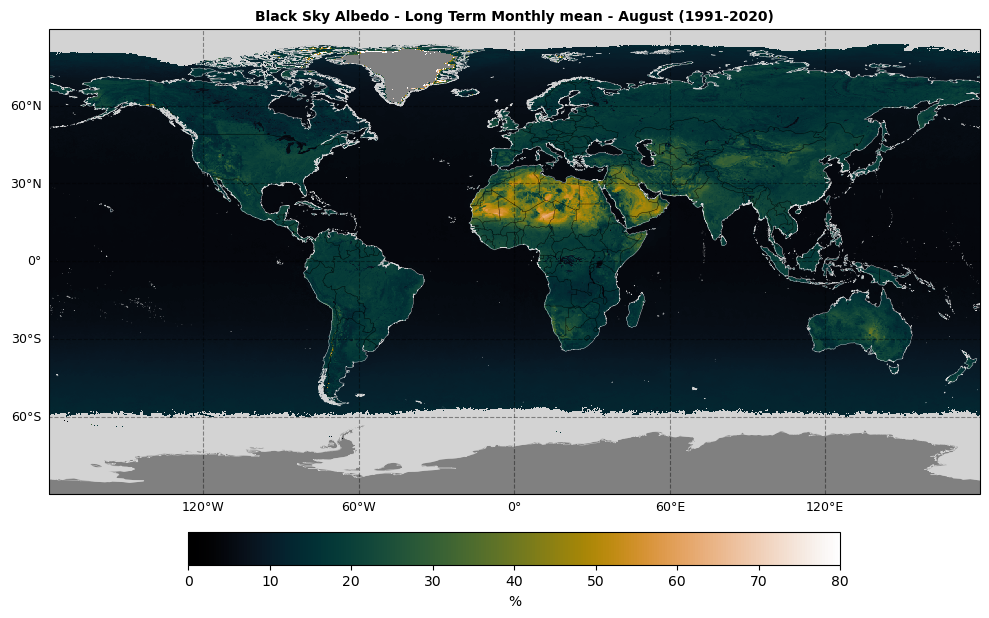

In [7]:
fig = plt.figure(figsize=(10,8))  #figure size
cmap1 = cmaps.savanna             #colormap selection


#---------------Product visualization--------------------------------
ax = plt.axes(projection= ccrs.PlateCarree())  #projection 
August_BSAL = BSAL_mean_August.plot(transform=ccrs.PlateCarree(), 
                                  add_colorbar=False, 
                                  cmap=cmap1,
                                  vmin = 0,
                                  vmax = 80) #data visualization


#---------------gridlines options-----------------------------------
gl = ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.4, 
              linestyle='--', 
              draw_labels=True)
gl.top_labels=False
gl.right_labels=False
gl.xlabel_style={'size':9}
gl.ylabel_style={'size':9}

#----------------adding features------------------------------
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightgrey', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='grey')



#---------------colorbar options-----------------------------------
cbar = plt.colorbar(August_BSAL , shrink = 0.7, pad = 0.05, orientation='horizontal',label= BSAL_monthly_mean.units)

ax.coastlines(color='lightgrey',resolution = '10m',linewidth = 0.3) #coastline options

plt.title('Black Sky Albedo - Long Term Monthly mean - August (1991-2020)', fontweight='bold', fontsize = 10)

fig.tight_layout()

plt.savefig('../img/BSAL_August_1991_2020.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

##### **Task 1-b)**
- load the polygon of the selected country
- extract the BSA long term mean for the country of interest
- plot the map for the required month

**Step 1.** Load the polygon of the selected country

Text(0.5, 1.0, 'Italy Polygon')

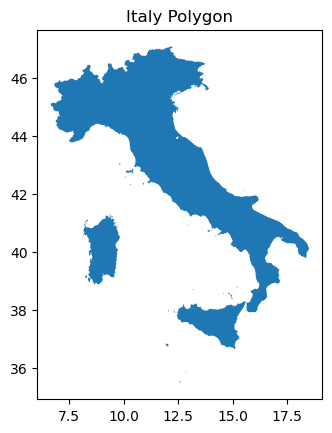

In [16]:
Geometry_Shape = geopandas.read_file('../MyData/Italy_shape/gadm36_ITA_0.shp', crs='epsg:4326')
Geometry_Shape.plot()
plt.title('Italy Polygon')

**Step 2.** Extract the BSA long term mean for the country of interest

The Xarray DataArray of the long term BSA mean has already been computed globally for August, so it is possible to extract the data only for the selected country.

In [17]:
BSAL_mean_August.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
BSAL_mean_August.rio.write_crs("epsg:4326", inplace=True)

clipped = BSAL_mean_August.rio.clip(Geometry_Shape.geometry.apply(mapping), Geometry_Shape.crs, drop=True,invert=False)

clipped

<xarray.DataArray 'black_sky_albedo_mean' (lat: 45, lon: 47)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon          (lon) float64 6.875 7.125 7.375 7.625 ... 17.88 18.12 18.38
  * lat          (lat) float64 35.88 36.12 36.38 36.62 ... 46.38 46.62 46.88
    month        int64 8
    spatial_ref  int64 0
Attributes:
    units:          %
    standard_name:  surface_albedo
    long_name:      Mean of black-sky albedo, non-snow/ice observations only
    cmsaf_info:     cmsafops::box_mergetime for variable black_sky_albedo_mean

**Step 3.** Plot the map for the required month

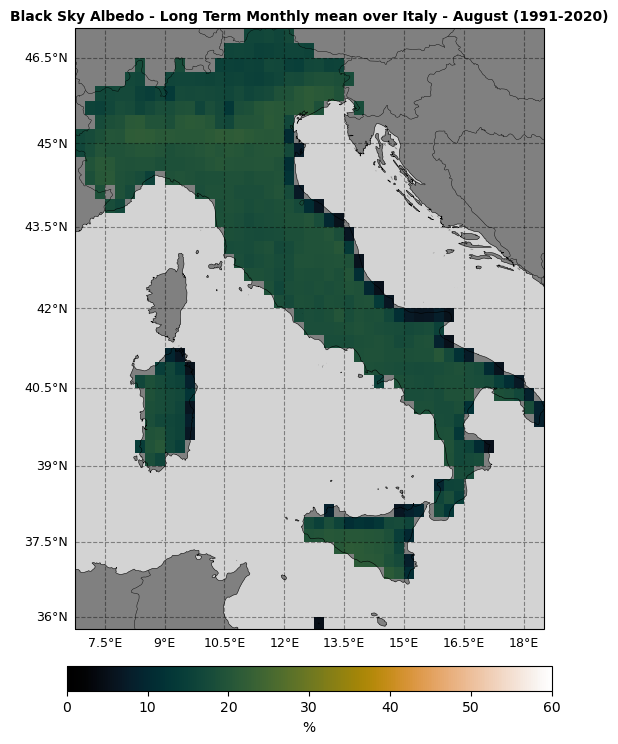

In [18]:
fig = plt.figure(figsize=(10,8))  #figure size
colormap = cmaps.savanna          #colormap selection

#---------------Product visualization--------------------------------
ax = plt.axes(projection=ccrs.epsg('3857'))
August_BSAL_Italy = clipped.plot(transform=ccrs.PlateCarree(), 
                                add_colorbar=False, 
                                cmap=colormap,
                                vmin = 0,
                                vmax = 60)  #data visualization


#---------------gridlines options-----------------------------------
gl = ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.4, 
              linestyle='--', 
              draw_labels=True)
gl.top_labels=False
gl.right_labels=False
gl.xlabel_style={'size':9}
gl.ylabel_style={'size':9}

#--------------optional features------------------------------------
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightgrey', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='grey')


#---------------colorbar options-----------------------------------
cbar = plt.colorbar(August_BSAL_Italy, shrink = 0.5, pad = 0.05, orientation='horizontal',label= BSAL_mean_August.units)

ax.coastlines(color='black',resolution = '10m',linewidth = 0.4) #coastline options

plt.title('Black Sky Albedo - Long Term Monthly mean over Italy - August (1991-2020)', fontweight='bold', fontsize = 10)

fig.tight_layout()

plt.savefig('../img/ITA_BSAL_August_1991_2020.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

#### **Task 2. Plot a time series of monthly mean CFC for Norrköping [lon 16.2 , lat 58.6] or a location of your choice**.

- define geografical coordinates of the selected point
- load the requested dataset
- find a CLARA-A3 grid box with defined coordinates 
- plot time series of monthly CFC over the requested period

**Step 1.** Define the geographical coordinates of the selected point

In [19]:
Location = 'Norrköping'
Latitude = 58.6
Longitude = 16.2

**Step 2.** Load the requested dataset

For the extraction of a complete monthly CFC timeseries in the requested location, it is possible to use the file with the whole temporal coverage of the CFC product:
    
`CLARA-A3_CFCmm_EU_1979-01-01-2023-08-01.nc `

In [20]:
CFC_month_rec = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/CLARA-A_SC/CLARA-A3_CFCmm_EU_1979-01-01-2023-08-01.nc'+'#mode=bytes')
CFC_month_rec

<xarray.Dataset>
Dimensions:    (lon: 184, lat: 156, time: 536, nb2: 2)
Coordinates:
  * lon        (lon) float64 -12.88 -12.62 -12.38 -12.12 ... 32.38 32.62 32.88
  * lat        (lat) float64 34.12 34.38 34.62 34.88 ... 72.12 72.38 72.62 72.88
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-08-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    cfc        (time, lat, lon) float32 ...
    time_bnds  (time, nb2) float64 ...
Attributes: (12/23)
    Info:                       Created with the CM SAF R Toolbox.
    title:                      CM SAF cLoud, Albedo and RAdiation dataset, A...
    summary:                    This file contains AVHRR-based Thematic Clima...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:            3.0
    creator_name:               DE/DWD
    ...                         ...
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    platform_vocabulary:        GCMD Platforms, Version 9.1.5
    platform:                   NOAA POES > NOAA Polar Orbiting Environmental...
    instrument_vocabulary:      GCMD Instruments, Version 9.1.5
    instrument:                 AVHRR > Advanced Very High Resolution Radiometer

**Step 3.** Find a CLARA-A3 grid box with defined coordinates 

The instruction to extract a time series requires not only the coordinates of the location but also an argument defining the method to extract the values from the current grid.

In [21]:
CFC_Norrköping = CFC_month_rec.sel(lat = Latitude, lon = Longitude, method = 'nearest')
CFC_Norrköping

<xarray.Dataset>
Dimensions:    (time: 536, nb2: 2)
Coordinates:
    lon        float64 16.12
    lat        float64 58.62
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-08-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    cfc        (time) float32 ...
    time_bnds  (time, nb2) float64 3.287e+03 3.318e+03 ... 1.957e+04 1.96e+04
Attributes: (12/23)
    Info:                       Created with the CM SAF R Toolbox.
    title:                      CM SAF cLoud, Albedo and RAdiation dataset, A...
    summary:                    This file contains AVHRR-based Thematic Clima...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:            3.0
    creator_name:               DE/DWD
    ...                         ...
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    platform_vocabulary:        GCMD Platforms, Version 9.1.5
    platform:                   NOAA POES > NOAA Polar Orbiting Environmental...
    instrument_vocabulary:      GCMD Instruments, Version 9.1.5
    instrument:                 AVHRR > Advanced Very High Resolution Radiometer

As the time series is referred to a single point, now the only coordinate that defines the variabilty of the parameter is the time.

**Step 4.** Plot time series of monthly CFC over the requested period

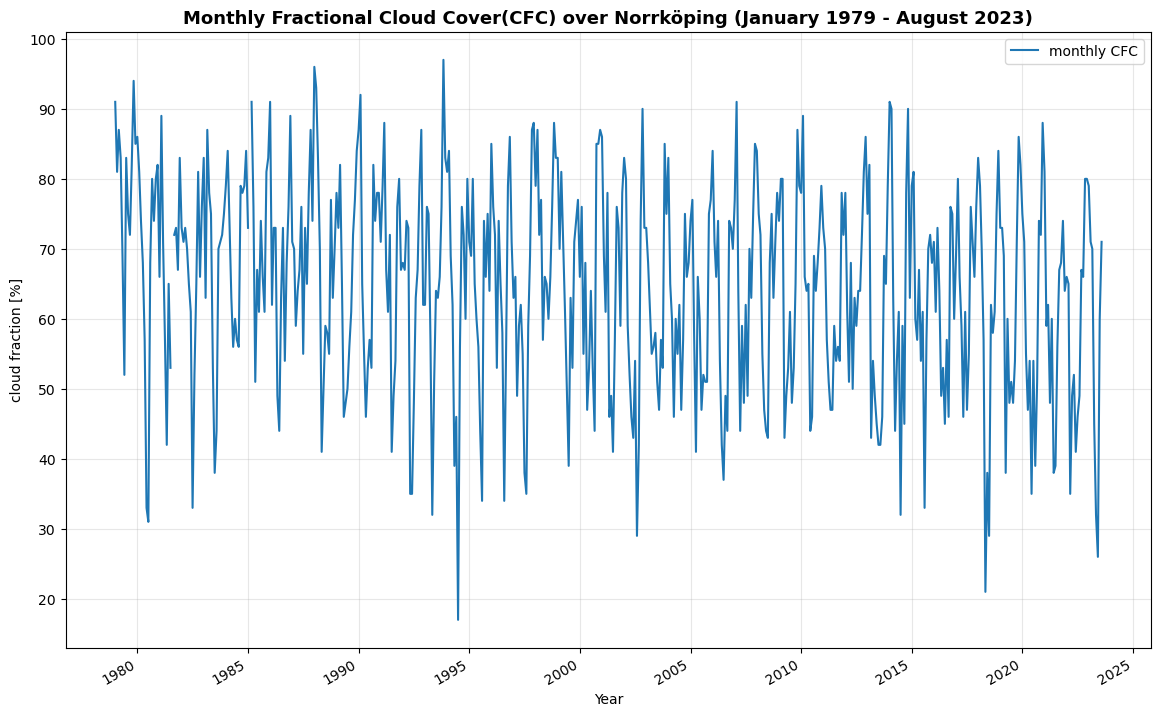

In [22]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes()
CFC_Norrköping.cfc.plot(ax=ax, label='monthly CFC')
ax.set_xlabel('Year')
ax.grid(alpha = 0.3)
ax.legend()
ax.set_title('Monthly Fractional Cloud Cover(CFC) over '+Location+' (January 1979 - August 2023)',fontweight = 'bold', fontsize = 13)
plt.savefig('../img/CFC_Norrköping_TS.png', dpi = 100, bbox_inches='tight')
plt.show()

#### **Task 3. Plot a map of the monthly anomaly of CLARA-A3 SIS for August 2023.** <span style="color:red">**(OPTIONAL)** </span>

- Load and open the SIS data record
- Extract the SIS data for the required reference period
- Calculate the monthly long term mean for August (Ref. Period. 1991-2020)
- Load the SIS data for August 2023
- Calculate the monthly anomaly for August as **data of August 2023 - August long term monthly mean (Subtraction)**
- Plot the monthly anomaly map of SIS for August 2023

The user should try to complete each point of the task and provide the final plot.

The solution is available in the notebook : [**CLARA_Task-3_Solution.ipynb**](https://training.cats.adamplatform.eu/hub/user-redirect/lab/tree/Notebooks/CLARA_Task-3_Solution.ipynb)

<hr>

<img src='https://git.services.meeo.it/ltpy/climate/-/raw/main/SMA2024_CM_SAF/img/CM_SAF_banner.png' align='center' width='100%'>